## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read the data
df = pd.read_csv('ab_data.csv')

# take a look at the top rows in the data
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# the number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# the number of unique users in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# the proportion of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# filter data with conditions (landing_page !="new_page") and (group=="treatment")
df_1 = df.query('landing_page != "new_page" and group == "treatment"')
# filter data with conditions (landing_page=="new_page") and (group !="treatment")
df_2 = df.query('landing_page == "new_page" and group != "treatment"')

# appending the two dates (df_1) and (df_2),then count the rows
(df_1.append(df_2)).user_id.count()

3893

f. Do any of the rows have missing values?

In [7]:
# discovring the data if it has null values or not
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# filter data with conditions (landing_page=="new_page") and (group=="treatment")
df_1 = df.query('landing_page == "new_page" and group == "treatment"')
# filter data with conditions (landing_page=="old_page") and (group=="control")
df_2 = df.query('landing_page == "old_page" and group == "control"')

# appending the two dates (df_1) and (df_2),then assign the new dataset to df2
df2 = df_1.append(df_2)
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.`

a. How many unique **user_id**s are in **df2**?

In [10]:
# the number of unique users
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# the repeated user_id
user_id_diplicated = df2[df2['user_id'].duplicated(keep=False) == True]
user_id_diplicated['user_id'].head(1)

1899    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
# the information of the repeated user_id
for index, row in user_id_diplicated.iterrows():
        display(row.to_frame())

,1899
user_id,773192
timestamp,2017-01-09 05:37:58.781806
group,treatment
landing_page,new_page
converted,0


,2893
user_id,773192
timestamp,2017-01-14 02:55:59.590927
group,treatment
landing_page,new_page
converted,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#drop the duplicated rows
df2.drop_duplicates(['user_id'],inplace=True)

`4.`

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# the probability of an individual converting regardless of the page they receive
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# the probability of an individual (group:control) converting regardless of the page they receive
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# the probability of an individual (group:treatment) converting regardless of the page they receive
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# the probability of an individual received the new page
(df2['landing_page'] == "new_page").mean()

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

> **Observations:**<br><br>
**The probability of converted individuals of control group is higher than
the probability of converted individuals of treatment group what means that
the old page has higher rate than the new page in converted individuals.  
The probability of reciving the new page is almost 0.5 what means that the
control and treatment groups have the same number of individuals which makes us
comparing the rates between groups under the same level of confidence(the size of data for every group is the same).  
In the end, the difference between the two rates is very small (0.0016)
which makes us need more analysis to prove that the old page is better**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**                  $H_{0}$ : $p_{old}$** >= **$p_{new}$   
                    $H_{1}$ : $p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# calculate the convert rate for p_new under the null which equals to convert...
# ... rate in the data regardless of the page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# calculate the convert rate for p_old under the null which equals to convert...
# ... rate in the data regardless of the page
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
# calculate the number of individuals who reciving the new_page
n_new = df2.query('landing_page == "new_page"').user_id.count()
n_new

145310

d. What is $n_{old}$?

In [21]:
# calculate the number of individuals who reciving the old_page
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# store the values of 0's and 1's in new_page_converted after simulating ...
# ... the p_new transactions with a convert rate of  p_new  under the null
new_page_converted = np.random.binomial(n=1,p=p_new,size=n_new)
new_page_converted

array([0, 0, 0, ..., 1, 1, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# store the values of 0's and 1's in old_page_converted after simulating ...
# ... the p_old transactions with a convert rate of  p_old  under the null
old_page_converted = np.random.binomial(n=1,p=p_old,size=n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# calculate the difference between the proportion of 1's in the ...
# ... new_page_converted and the proportion of 1's in the old_page_converted
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

-6.414405863110206e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [25]:
# simulate the (p_new , p_old) 10000 times
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old

# calculate the difference between the new_converted_simulation and old_converted_simulation
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs

array([-1.08967959e-03,  6.38192327e-04,  9.95976320e-04, ...,
       -1.76404863e-03, -8.35206742e-04, -9.18658263e-05])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [26]:
# calculate the actual difference of convert rates of both pages in the observed data
# the observed rates of converted individuals for both pages
p_new_converted = df2.query('landing_page == "new_page"')['converted'].mean() 
p_old_converted = df2.query('landing_page == "old_page"')['converted'].mean()

# the actual difference of convert rates of both pages in the observed data
obs_p_diff = p_new_converted - p_old_converted
obs_p_diff

-0.0015782389853555567

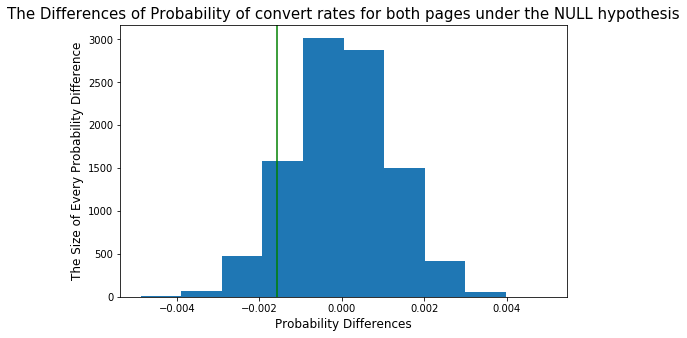

In [27]:
# making plot much bigger to make it visible
plt.figure(figsize=(8,5))

# plot a histogram of p_diffs
plt.hist(p_diffs)

# title and labels
plt.title('The Differences of Probability of convert rates for both pages under the NULL hypothesis',fontsize=15)
plt.xlabel('Probability Differences',fontsize=12)
plt.ylabel('The Size of Every Probability Difference',fontsize=12)

# plot the axis of observed difference in probablities of both pages
plt.axvline(x=obs_p_diff, color='green');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# calculate the p_value of p_diffs under the null hypothesis
p_value = (p_diffs > obs_p_diff).mean()
p_value

0.9087

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>**Observations:**<br><br>
**-The value we calculated in the part  'j'  called p_value(which means the probability of observing the statistic if the null hypothesis is true).  
-This value is greater than 0.05 (the probability of commiting errors from type 1) which means we fail to reject the NULL hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').landing_page.count()
convert_new = df2.query('landing_page == "new_page" and converted == 1').landing_page.count()
n_old = df2.query('landing_page == "old_page"').landing_page.count()
n_new = df2.query('landing_page == "new_page"').landing_page.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
z_score ,p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative ='smaller')
z_score ,p_value

(1.3109241984234394, 0.9050583127590245)

In [31]:
# import scipy.stats
from scipy.stats import norm

# knowing how significant our z-score is
significant_z_score = norm.cdf(z_score)

# calculate the critical value at 95% confidence
critical_value = norm.ppf(1-(0.05/2))

# the values
significant_z_score,critical_value

(0.9050583127590245, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>**Observations:**
**-The z_score (1.31) is less than the critical value (1.96) which makes us fail to reject the NULL hypothesis.  
-Yes, they agree with findings in parts 'j' and 'k'**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The type is logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# add column 'ab_page' which contains values of 1 (treatment) and 0 (control)
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.drop('control',axis=1,inplace=True)

# add the column intercept to the data
df2['intercept'] = 1

# test
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
# fit the logistic regression model with intercept and ab_page to predict value of converted
mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
# the summary of the results of the logistic regression model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        05:12:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br> 

>**Observations:**<br><br>
**-The p_value is 0.190  
-The p_value in this logistic regression model is different from the p_value in the last model(PART II),and that is beacuse the assuming of the hypothesis.In the PART II we assume that the NULL hypothesis is that p_old is equal or better than p_old but in this PART(PART III) we assume that the NULL hypothesis is that p_old is equal to p_new.  
--in the PART II,a one-tail test:  
                $H_{0}$ : $p_{old}$** >= **$p_{new}$   
                $H_{1}$ : $p_{old}$** < **$p_{new}$  
--in the PART III,a two-tailed test:  
                 $H_{0}$ : $p_{old}$** = **$p_{new}$   
                    $H_{1}$ : $p_{old}$** $\neq$ **$p_{new}$**


>**To convert the p_value of the two-tail test in PART III to the p_value of the one-tail test in PART II:  
1-we divide the p_value of the two-tail test by 2.  
2-if the value of the sign of coefficient is positive(+),then the p_value of the one-tail test will be the value we calculated in the first step.  
3-if the value of the sign of coefficient is negative(-),then the p_value of the one-tail test will be "1 - the value we calculated in the first step".<br><br>
--the p_value of the two-tail test in PART III is 0.190  
--the p_value of the one-tail test in PART II is 0.905  
--calulating the the p_value of the one-tail test in PART II based on the p_value of the two-tail test in PART III:  
1- 0.190 / 2 = 0.095  
2- the sign of the coefficient is (-) ,so the the p_value of the one-tail test is 1 - 0.095 = 0.905  
3-as we saw in the previous step,we calculate the the p_value of the one-tail test which is the same value we compute before in PART II.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> **-There are many other factors which may be influence whether or not an individual converts like the country,the age,the eduction,the duration that the individual used to take while browsing the website(which gives us about the caring level of the website for the individuals)...etc  
-Yes, there are problems when we add factors like multicollinearity and this problem happens because of existing of explanatory variable related to another explanatory variable which makes the predicting of the response not completely right and causes some potential negative impacts like bad expections(ex:we assume that the relation between the explanatory variables and the response has positive regression coefficients but we find that the coefficients are negative)
and the results of hypothesis test may not be reliable.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns

In [35]:
# read the data of countries
df_countries = pd.read_csv('countries.csv')

# merging the data of counties with the original data df2
df2 = df2.merge(df_countries,on='user_id')

# test
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [36]:
# discover the values in the column country in the data
df2['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [37]:
# add three columns for countries 'US' ,'UK' ,'CA' with values 1 and 0
df2[['CA','UK','US']] = pd.get_dummies(df2['country'])

# test
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
# fit the logistic regression model with intercept ,UK and US with baseline 'CA'
# ... to predict value of converted
mod = sm.Logit(df2['converted'],df2[['intercept','UK','US']])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [39]:
# the summary of the results of the logistic regression model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Feb 2021   Pseudo R-squ.:               1.521e-05
Time:                        05:12:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

>**Observations:**<br><br>
**-The p_values of both countries 'UK','US' are higher than 0.05(the probability of commiting errors from type 1) which means that we fail to reject the NULL hypothesis.**

In [40]:
# add the interactions between countries 'UK','US' and the page 
df2['ab_page_UK'] = df2['ab_page'] * df2['UK']
df2['ab_page_US'] = df2['ab_page'] * df2['US']

# test
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,ab_page_UK,ab_page_US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,0,0


In [41]:
# fit the logistic regression model with intercept ,UK and US with baseline 'CA'
# ... and ab_page_UK and ab_page_US to predict value of converted
mod = sm.Logit(df2['converted'],df2[['intercept','UK','US','ab_page_UK','ab_page_US']])
res = mod.fit()

# the summary of the results of the logistic regression model
res.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Fri, 19 Feb 2021   Pseudo R-squ.:               2.691e-05
Time:                        05:12:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0453      0.031      1.481      0.139      -0.015       0.105
US             0.0511      0.028      1.841      0.066      -0.003       0.105
ab_page_UK     0.0108      0.023      0.475      0.635      -0.034       0.056
ab_page_US    -0.0206      0.014     -1.505      0.132      -0.047       0.006
==============================================================================
"""

>**Observations:**<br><br>
**-The p_values of countries and interactions between these countries and page are higher than 0.05(the probability of commiting errors from type 1) which means that we fail to reject the NULL hypothesis.  
-After many tests and fiting logistic models with data, we fail to reject the NULL hypothesis under all results we get.**

In [42]:
# calculate the min date and the max date
t1 ,t2 = pd.to_datetime(df.timestamp.min()),pd.to_datetime(df.timestamp.max())

# calculate the difference between max date(t2) and min date(t1)
time_experment = pd.Timedelta(t2 - t1)
time_experment

Timedelta('21 days 23:59:49.081927')

>**Observations:**<br><br>
**The time that the experment took to run is quite long but because we don't observe any change in convertes rate between the new page and the old page...we sould make the time that the experment takes much longer to be very sure that the new age have no success.**

## Conclusions<br><br><br>
>**--in the PART II,we assume that:  
                $H_{0}$ : $p_{old}$** >= **$p_{new}$   
                $H_{1}$ : $p_{old}$** < **$p_{new}$  
--in the PART III,we assume that:  
                 $H_{0}$ : $p_{old}$** = **$p_{new}$   
                 $H_{1}$ : $p_{old}$** $\neq$ **$p_{new}$**


> - **In the both parts(PART II,PART III),we fail to reject the NULL hyposthesis
$H_{0}$ Which means that there are no difference in converted rates between the old page and the new page.** <br>  
- **With these results,the company should keep the old page because the new page have no success.** <br>  
- **The company should make the time that the experment takes much longer to get more accurate results and make sure the new page has no success over the old page**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!


In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0